## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [3]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [4]:
# your code here
model1 = nn.Sequential(
    nn.Linear(2, 6),
    nn.ReLU(),
    nn.Linear(6, 2),
    nn.Sigmoid()  
)


model2 = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 2),
    nn.Sigmoid()
)

model3 = nn.Sequential(
    nn.Linear(2, 12),
    nn.Sigmoid(),
    nn.Linear(12, 8),
    nn.Sigmoid(),
    nn.Linear(8, 2),
    nn.Sigmoid()
)

In [5]:
print(model1)
print(model2)
print(model3)

Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=2, bias=True)
  (3): Sigmoid()
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=6, bias=True)
  (3): ReLU()
  (4): Linear(in_features=6, out_features=2, bias=True)
  (5): Sigmoid()
)
Sequential(
  (0): Linear(in_features=2, out_features=12, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=2, bias=True)
  (5): Sigmoid()
)


In [6]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [7]:
# your code here
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float32)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [8]:
# your code here
criterion = nn.BCELoss()
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.01)


In [9]:
# your code here
# Train the model
def train_model(model, optimizer, epochs=5000, lr=0.05):
    loss_history = []  
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(data_in)
        loss = criterion(output, data_target)
        loss.backward()
        optimizer.step()   
        loss_history.append(loss.item())  
    predictions = torch.round(model(data_in))
    accuracy = (predictions == data_target).float().mean().item()
    return loss.item(), accuracy, loss_history

loss1, acc1, history1 = train_model(model1, optimizer1)
loss2, acc2, history2 = train_model(model2, optimizer2)
loss3, acc3, history3 = train_model(model3, optimizer3)
results = [
    ("model1", loss1, acc1),
    ("model2", loss2, acc2),
    ("model3", loss3, acc3),
]
for name, loss, acc in results:
    print(f"{name}: final loss = {loss:.6f}, accuracy = {acc:.2f}")

model1: final loss = 0.176783, accuracy = 0.88
model2: final loss = 0.064596, accuracy = 1.00
model3: final loss = 0.625916, accuracy = 0.62


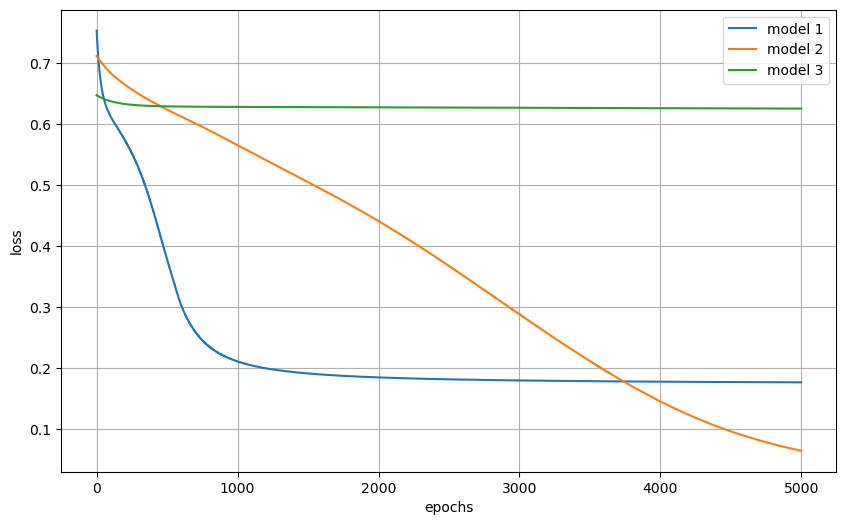

In [10]:
# your code here
# visualize the resuts
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history1, label="model 1")
plt.plot(history2, label="model 2")
plt.plot(history3, label="model 3")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# your code here
# print model wights
print("m1 weights:")
print(model1.state_dict())

print("\nm2 weights:")
print(model2.state_dict())

print("\nm3 weights:")
print(model3.state_dict())


m1 weights:
OrderedDict({'0.weight': tensor([[-0.3653, -0.5493],
        [ 3.0607, -3.0577],
        [ 3.2754,  1.2763],
        [ 0.0478, -0.5539],
        [-0.4124, -0.1873],
        [ 0.1978, -0.3347]]), '0.bias': tensor([-7.9092e-04, -3.1952e-03, -1.2958e+00, -2.6520e-01, -3.2957e-01,
        -5.9474e-01]), '2.weight': tensor([[ 0.2389, -2.7475,  3.2073,  0.3020, -0.3326,  0.2559],
        [ 0.3323,  3.2835, -1.8721, -0.3224, -0.1405, -0.3505]]), '2.bias': tensor([-4.6142e+00, -8.7117e-04])})

m2 weights:
OrderedDict({'0.weight': tensor([[-0.4305, -0.7321],
        [-0.9886, -0.7172],
        [ 0.8803,  0.8258],
        [ 0.2221, -0.3718],
        [ 0.8459, -0.5585],
        [ 0.6868, -0.4782],
        [ 0.4203,  0.1825],
        [ 0.9143,  0.8608],
        [-0.5354, -1.2981],
        [ 0.6231, -0.4933]]), '0.bias': tensor([-0.4747,  1.2597, -0.8176, -0.3818,  0.2831, -0.4121,  0.0456, -0.5132,
         1.1320, -0.6642]), '2.weight': tensor([[ 0.3249,  0.7983, -0.9638,  0.0274,  0.

In [12]:
#choosing the best model pt ca totul este ierarhizat in aceasta viata
best_model = max(results, key=lambda x: x[2])
print(f"best of the best model: {best_model[0]} ; accuracy : {best_model[2]:.2f}")

if best_model[0] == "model1":
    print(model1.state_dict())
elif best_model[0] == "model22":
    print(model2.state_dict())
else:
    print(model3.state_dict())

best of the best model: model2 ; accuracy : 1.00
OrderedDict({'0.weight': tensor([[-0.4973, -0.4902],
        [-0.0950, -0.1804],
        [-0.3606,  0.6657],
        [ 0.2180, -0.4921],
        [-0.5765, -0.6424],
        [ 0.1343,  0.4748],
        [-0.6590,  0.5842],
        [ 0.2368,  0.1146],
        [ 0.6505, -0.1177],
        [-0.6270, -0.2740],
        [-0.6257,  0.0288],
        [ 0.6697,  0.6675]]), '0.bias': tensor([ 0.2472,  0.2698, -0.3468,  0.0564,  0.3877, -0.6088,  0.3482, -0.3545,
        -0.5745, -0.6158,  0.1831, -0.5949]), '2.weight': tensor([[ 0.1693, -0.1205, -0.1185,  0.2617, -0.1823, -0.0125, -0.0256,  0.2027,
          0.0792, -0.2481,  0.2816,  0.0447],
        [-0.0743,  0.2394, -0.2939, -0.1284, -0.1768,  0.2411, -0.1515,  0.1039,
          0.0093,  0.2702,  0.0905, -0.3140],
        [ 0.2572, -0.2498, -0.2587,  0.2046, -0.1869,  0.0677,  0.2919, -0.0516,
          0.0838,  0.2939,  0.2357, -0.0721],
        [-0.0156,  0.1488,  0.0512,  0.1678,  0.2720, -0.19